funciones de `scipy.stats.norm`:

- **`norm.pdf(x, loc, scale)`**  
  Devuelve el valor de la función de densidad de probabilidad (Probability Density Function) en el punto `x`.  
  **Interpretación:** Altura de la curva normal en `x`.  
  **Uso:** Para graficar la forma de la distribución.

- **`norm.cdf(x, loc, scale)`**  
  Devuelve la función de distribución acumulada (Cumulative Distribution Function) en el punto `x`.  
  **Interpretación:** Probabilidad de que la variable aleatoria sea menor o igual a `x` (P(X ≤ x)).  
  **Uso:** Para calcular probabilidades acumuladas.

- **`norm.sf(x, loc, scale)`**  
  Devuelve la función de supervivencia (Survival Function), que es igual a 1 - CDF.  
  **Interpretación:** Probabilidad de que la variable aleatoria sea mayor que `x` (P(X > x)).  
  **Uso:** Para calcular probabilidades de cola superior.

**Resumen:**  
- `pdf`: densidad en un punto  
- `cdf`: probabilidad acumulada hasta un punto  
- `sf`: probabilidad acumulada desde un punto hacia arriba

`sf` (survival function):

- **`sf(x)` calcula P(X > x)**, es decir, la probabilidad de que la variable sea mayor que un valor dado.
- En los ejercicios, la pregunta era:  
  - ¿Cuál es la probabilidad de que una bombilla dure **más de** 1524 horas?  
  - ¿Cuál es la probabilidad de que la media sea **superior a** cierto valor?
- Por eso, `sf` es la función directa y más clara para responder preguntas de tipo "mayor que" (`P(X > x)`).

**En resumen:**  
- Usa `sf(x)` para "mayor que" (`P(X > x)`)
- Usa `cdf(x)` para "menor o igual que" (`P(X ≤ x)`)
- Usa `pdf(x)` solo para obtener la densidad, no probabilidades acumuladas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 1. Duración de bombillas (N(1500, 160))
- Si escogemos una bombilla al azar, ¿P(X > 1524)?
- Si escogemos una muestra de 100 bombillas, ¿P(media > 1524)?

In [2]:
mu = 1500
sigma = 160
x = 1524
n = 100
# Probabilidad para una bombilla
p1 = norm.sf(x, loc=mu, scale=sigma)
# Probabilidad para la media muestral
sigma_xbar = sigma / np.sqrt(n)
p2 = norm.sf(x, loc=mu, scale=sigma_xbar)
print(f'P(X > 1524) = {p1:.4f}')
print(f'P(media muestral > 1524) = {p2:.4f}')

P(X > 1524) = 0.4404
P(media muestral > 1524) = 0.0668


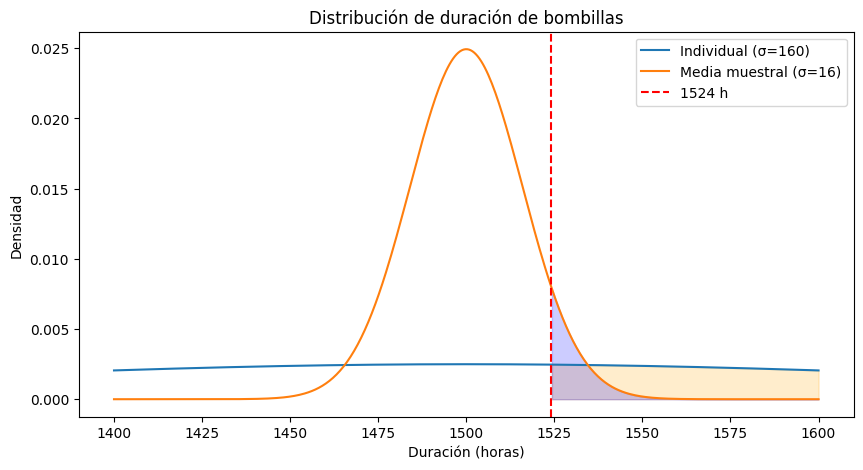

In [3]:
# Gráfica de la distribución individual y de la media muestral
x_vals = np.linspace(1400, 1600, 400)
plt.figure(figsize=(10,5))
plt.plot(x_vals, norm.pdf(x_vals, mu, sigma), label='Individual (σ=160)')
plt.plot(x_vals, norm.pdf(x_vals, mu, sigma_xbar), label='Media muestral (σ=16)')
plt.axvline(x, color='red', linestyle='--', label='1524 h')
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu, sigma), where=(x_vals>x), color='orange', alpha=0.2)
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu, sigma_xbar), where=(x_vals>x), color='blue', alpha=0.2)
plt.title('Distribución de duración de bombillas')
plt.xlabel('Duración (horas)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

## 2. Pesos de ovejas (media=50, σ=4, n=100)
- P(media > 51)
- P(media < 56)
- P(media > 49)
- P(49.5 < media < 50.3)
- Interpretación de resultados

In [6]:
mu = 50
sigma = 4
n = 100
sigma_xbar = sigma / np.sqrt(n)
# a) P(media > 51)
p_sup_51 = norm.sf(51, loc=mu, scale=sigma_xbar)
print(f'P(media > 51 kg) = {p_sup_51:.6f}')

# b) P(media < 56)
p_inf_56 = norm.cdf(56, loc=mu, scale=sigma_xbar)
print(f'P(media < 56 kg) = {p_inf_56:.6f}')

# c) P(media > 49)
p_sup_49 = norm.sf(49, loc=mu, scale=sigma_xbar)
print(f'P(media > 49 kg) = {p_sup_49:.6f}')

# d) P(49.5 < media < 50.3)
p_entre_49_5_y_50_3 = norm.cdf(50.3, loc=mu, scale=sigma_xbar) - norm.cdf(49.5, loc=mu, scale=sigma_xbar)
print(f'P(49.5 < media < 50.3 kg) = {p_entre_49_5_y_50_3:.6f}')

P(media > 51 kg) = 0.006210
P(media < 56 kg) = 1.000000
P(media > 49 kg) = 0.993790
P(49.5 < media < 50.3 kg) = 0.667723


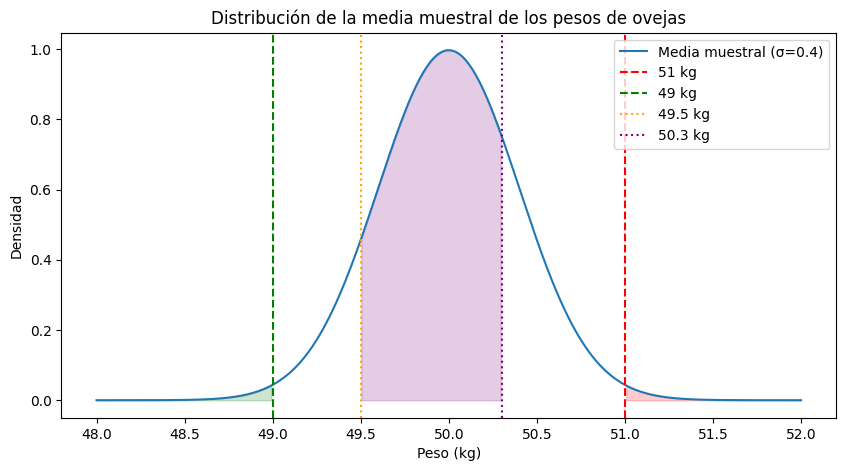

In [5]:
# Gráfica de la distribución de la media muestral de los pesos
x_vals = np.linspace(48, 52, 400)
plt.figure(figsize=(10,5))
plt.plot(x_vals, norm.pdf(x_vals, mu, sigma_xbar), label='Media muestral (σ=0.4)')
plt.axvline(51, color='red', linestyle='--', label='51 kg')
plt.axvline(49, color='green', linestyle='--', label='49 kg')
plt.axvline(49.5, color='orange', linestyle=':', label='49.5 kg')
plt.axvline(50.3, color='purple', linestyle=':', label='50.3 kg')
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu, sigma_xbar), where=(x_vals>51), color='red', alpha=0.2)
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu, sigma_xbar), where=(x_vals<49), color='green', alpha=0.2)
plt.fill_between(x_vals, 0, norm.pdf(x_vals, mu, sigma_xbar), where=((x_vals>49.5)&(x_vals<50.3)), color='purple', alpha=0.2)
plt.title('Distribución de la media muestral de los pesos de ovejas')
plt.xlabel('Peso (kg)')
plt.ylabel('Densidad')
plt.legend()
plt.show()

### Interpretación de resultados
- La probabilidad de que la media muestral esté lejos de la media poblacional es muy baja.
- El teorema central del límite garantiza que la media muestral se distribuye normalmente para muestras grandes.
- La desviación estándar de la media muestral es mucho menor que la de la población, por lo que la media de muchas muestras varía poco.
- Esto permite hacer inferencia y tomar decisiones con confianza sobre la media poblacional.